In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\Balaji Fast Food Sales.csv")
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [3]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [5]:
df['transaction_type'].mode()

0    Cash
Name: transaction_type, dtype: object

In [7]:
df['transaction_type'].fillna("Cash", inplace=True)

In [8]:
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    1000 non-null   object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.2+ KB


<Axes: title={'center': 'Number of orders'}, xlabel='date'>

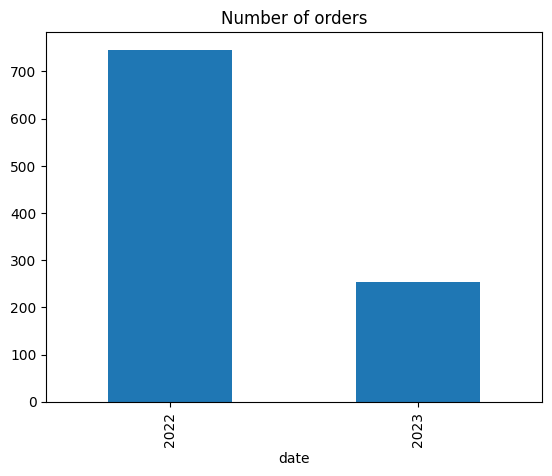

In [27]:
df.groupby(df['date'].dt.year)['order_id'].count().plot(kind='bar',title='Number of orders')

In [41]:
px.line(x=df.groupby(df['date'].dt.month)['transaction_amount'].sum().index,
        y=df.groupby(df['date'].dt.month)['transaction_amount'].sum().values,
        title='Revenue by date')

In [47]:
px.bar(x=df.groupby('item_name')['transaction_amount'].sum().index,
       y=df.groupby('item_name')['transaction_amount'].sum().values,
       title="Revenue by item")

In [53]:
px.bar(x=df.groupby('time_of_sale')['transaction_amount'].sum().index,
       y=df.groupby('time_of_sale')['transaction_amount'].sum().values,
       title="revenue by time")

In [54]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
